# Koneoppiminen: Tehtävä 6: Koneoppimismallien vertailu (max 15 p)

In [1]:
# Kirjoita tähän tietosi!
student_name = 'Jere Soininen'
student_id = 'AB6802'


Tehtävässä vertaillaan eri koneoppimismenetelmät (kuusi eri menetelmää) samalle datalle.
Tallennetaan tulokset ja analysoidaan ne.
Esitetään tuloksia myös visuaalisesti (Ennustetarkkuus, sekaannusmatriisi, ROC-käyrä).
Lisäksi vertaillaan saatuja tuloksia sekä pohditaan tuloksia sanallisesti.

## Aineisto: Äänet

Tiedostossa [voice.csv](./voice.csv) on mittaustietoja äänistä (kenttien selitykset tiedostossa ovat englanniksi).

Pyri ennustamaan kentän `label (male/female)` arvoa muiden kenttien avulla eri koneoppimismenetelmien avulla.

Jaa data opetusdataan ja testidataan suhteessa 80/20%.

* Tulosta myös kuinka paljon eri kentät vaikuttavat mallin mukaan ennustettavaan muuttujaan (*importances*).
* Valitse sitten kaksi tärkeintä selittävää muuttujaa ja tulosta näistä scatter-kaavio niin että *male/female* -pisteet ovat eri värillä.

## Tehtävä 6.1
### Datan esikäsittely (2 pistettä)

Tutustu aineistoon ja toteuta datan esikäsittely.
* Esikäsittelyn toteutuksessa kannattaa huomioida, että `male` ja `female` kenttien arvot oltava numeerisia koneoppimisvaiheessa

In [2]:
# tässä vähän risteäväisyyksiä 1 ja 2 kohdan tehtävillä muttta kaikki stepit on tehtynä

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("voice.csv")
# meanfun ja IQR olivat selvästi merkityksellisimmät ominaisuudet
df = df[['meanfun', 'IQR', 'label']]

df['label'] = df['label'].map({'male': 0, 'female': 1})

X = df.drop('label', axis=1)
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# katsotaan importances käyttämällä rfc sillä materiaalissa hyvä malli, ymmärtääkseni
# importancea ei voi katsoa käytämättä mitään mallia?
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Test accuracy: %.2f" % model.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

importances = model.feature_importances_
for i in range(len(importances)):
     print("Feature: %12s - Relative importance: %4.1f %%" % (X.columns[i], importances[i] * 100))


Test accuracy: 0.97
[[323  14]
 [  6 291]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       337
           1       0.95      0.98      0.97       297

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

Feature:      meanfun - Relative importance: 58.3 %
Feature:          IQR - Relative importance: 41.7 %


## Tehtävä 6.2
### Koulutus- ja testiaineisto (2 pistettä)

Tehdään datan jako opetus- ja testijoukkoon sekä skaalataan numeerinen data.

In [3]:
# TODO: Kirjoita toteutuksesi tähän soluun.
from sklearn.preprocessing import MinMaxScaler

#X_train = X_test = y_train = y_test = []
#print(df)
mms = MinMaxScaler().fit(X_train)

X_train = pd.DataFrame(mms.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(mms.transform(X_test), columns=X.columns)

print(X_train)
print(X_test)


       meanfun       IQR
0     0.421330  0.239920
1     0.660556  0.096267
2     0.626416  0.198279
3     0.798285  0.591160
4     0.445410  0.400236
...        ...       ...
2529  0.533229  0.050556
2530  0.460019  0.396904
2531  0.373724  0.474255
2532  0.302193  0.367487
2533  0.387440  0.412510

[2534 rows x 2 columns]
      meanfun       IQR
0    0.643839  0.068242
1    0.425803  0.380136
2    0.298929  0.596876
3    0.514479  0.154031
4    0.544679  0.116481
..        ...       ...
629  0.473372  0.205434
630  0.442469  0.430351
631  0.445534  0.422273
632  0.399668  0.335412
633  0.724848  0.107367

[634 rows x 2 columns]


In [4]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

## Tehtävä 6.3
### Mallien rakentaminen (7 pistettä)

Ajetaan eri oppimismenetelmät samalle datalle ja tallennetaan tulokset.
Tässä tehtävässä käytetään seuraavia menetelmiä:
1. Päätöspuu (1p)
2. Tukivektorikone eli SVM (1p)
3. k lähintä naapuria eli kNN (1p)
4. Naiivi Nayes Bayes (1p)
5. Satunnaismetsä eli RandomForest (1p)
6. PCA - osa 6 esimerkin aihe (2 p)

Laske kaikissa menetelmissä luokittelutuloksien **tarkkuus** ja **sekaannusmatriisi**.


Test length: 634
Train length: 2534
Train columns: Index(['meanfun', 'IQR'], dtype='object')
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       337
           1       0.94      0.97      0.96       297

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

[[320  17]
 [  9 288]]


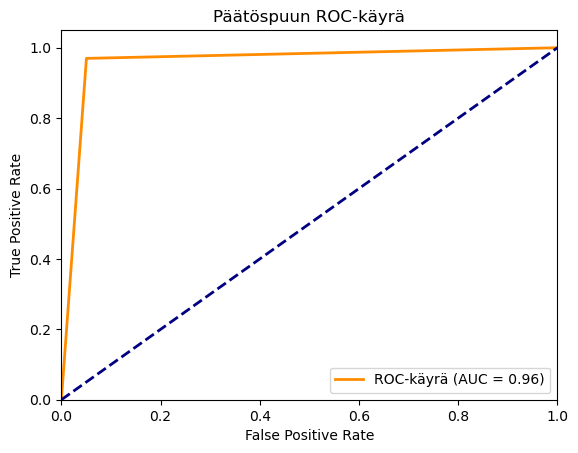

In [5]:
# TODO: Malli 1: Päätöspuun toteutus
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Test length: {len(X_test)}')
print(f'Train length: {len(X_train)}')
print(f'Train columns: {X_train.columns}')

print(cr)
print(cm)

# ROC-käyrän laskenta ja piirtäminen
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-käyrä (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Päätöspuun ROC-käyrä')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       337
           1       0.98      0.97      0.97       297

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

[[330   7]
 [  8 289]]


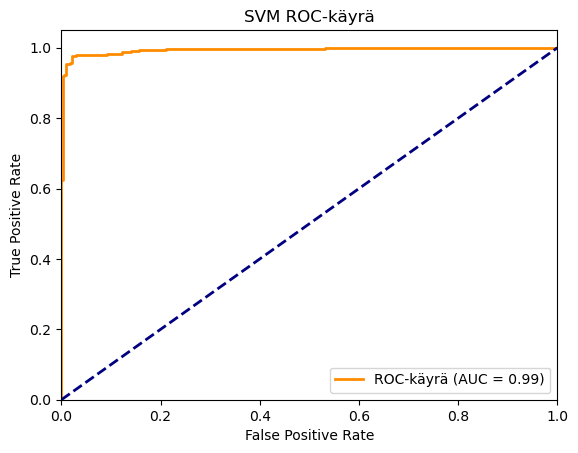

In [6]:
# TODO: Malli 2: Tukivektorikoneen toteutus
from sklearn.svm import LinearSVC


cr = cm = None

svm = LinearSVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(cr)
print(cm)

# ROC-käyrän laskenta ja piirtäminen käyttäen decision_function()
y_score = svm.decision_function(X_test)  # Käytetään decision_function() ROC-käyrän laskemiseen
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-käyrä (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC-käyrä')
plt.legend(loc="lower right")
plt.show()

634
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       337
           1       0.96      0.97      0.96       297

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

[[325  12]
 [  9 288]]


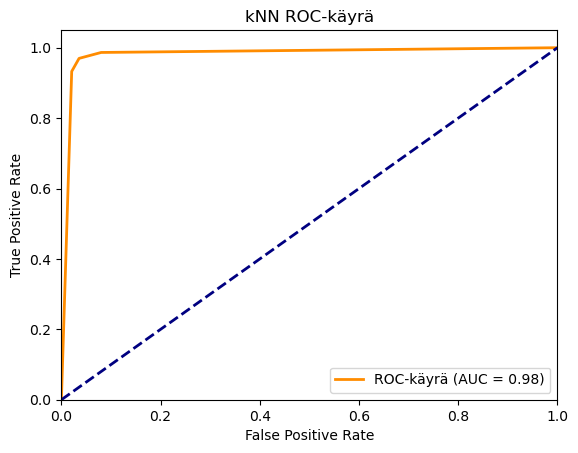

In [7]:
# TODO: Malli 3: kNN toteutus
from sklearn.neighbors import KNeighborsClassifier

cr = cm = None
# k = 3 antoi tässä parhaan ja tasapainoisimman tuloksen.
# muistan että neuvo oli yleensä aina käyttää vähintään k=5 mutta mennäään nyt tällä
knn = KNeighborsClassifier(n_neighbors=3)
knn_pred = knn.fit(X_train, y_train).predict(X_test)
print(f'{len(knn_pred)}')

cr = classification_report(y_test, knn_pred)
cm = confusion_matrix(y_test, knn_pred)

print(cr)
print(cm)

y_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-käyrä (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('kNN ROC-käyrä')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       337
           1       0.97      0.98      0.97       297

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

[[328   9]
 [  6 291]]


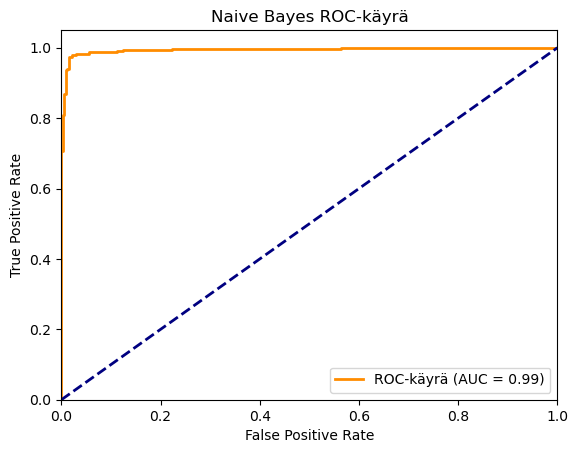

In [8]:
# TODO: Malli 4: Bayes toteutus
from sklearn.naive_bayes import GaussianNB

cr = cm = None

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(cr)
print(cm)

y_proba = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-käyrä (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC-käyrä')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       337
           1       0.95      0.98      0.97       297

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

[[323  14]
 [  6 291]]


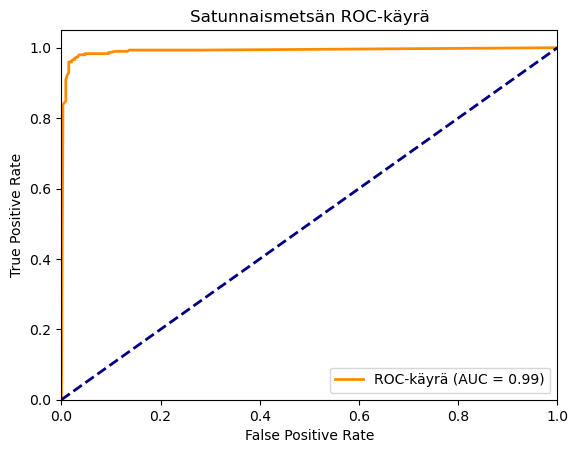

In [9]:
# TODO: Malli 5: Satunnaismetsän toteutus
from sklearn.ensemble import RandomForestClassifier

cr = cm = None

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Ennusta testausaineiston class-muuttuja
y_pred = model.predict(X_test)

# Luo tarkkuusraportti ja sekaannusmatriisi
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(cr)
print(cm)

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-käyrä (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Satunnaismetsän ROC-käyrä')
plt.legend(loc="lower right")
plt.show()

[0.50961791 0.12101663 0.08546637 0.06063976 0.05467513 0.03867532
 0.0298059  0.02593087 0.02354558 0.01694216 0.01141853 0.00878345
 0.00529822 0.00465695 0.00295283]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       337
           1       0.99      0.97      0.98       297

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

[[334   3]
 [ 10 287]]


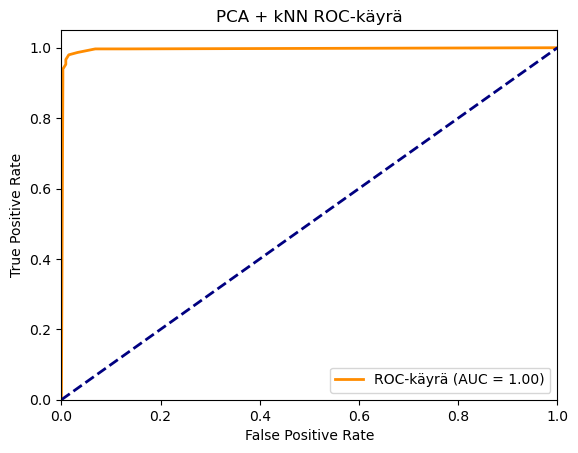

In [10]:
# TODO: Malli 6: PCA yhdistettynä johonkin luokittelumalliin
from sklearn import datasets
from sklearn.decomposition import PCA
# tässä on ilmeisesti aika nolla hyöty käyttää pca sillä meillä oli alunperinkin valittu vain 2 tärkeintä komponenttia?
# siispä kokeillaan vetää aijemmat määrittelyt rajusti nollille jotta saadaan testailtua menetelmää
cr = cm = None
df = None
X_train = X_test = y_train = y_test = []

df = pd.read_csv("voice.csv")
df['label'] = df['label'].map({'male': 0, 'female': 1})

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mms = MinMaxScaler().fit(X_train)

X_train = pd.DataFrame(mms.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(mms.transform(X_test), columns=X.columns)

# 15 saa parhaan tuloksen
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_pca, y_train)

knn_pred = knn.predict(X_test_pca)

cr = classification_report(y_test, knn_pred)
cm = confusion_matrix(y_test, knn_pred)

print(pca.explained_variance_ratio_)

print(cr)
print(cm)

y_proba = knn.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-käyrä (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('PCA + kNN ROC-käyrä')
plt.legend(loc="lower right")
plt.show()

[0.50961791 0.12101663 0.08546637 0.06063976 0.05467513 0.03867532
 0.0298059  0.02593087 0.02354558 0.01694216 0.01141853 0.00878345
 0.00529822 0.00465695]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       337
           1       0.98      0.98      0.98       297

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

[[330   7]
 [  5 292]]


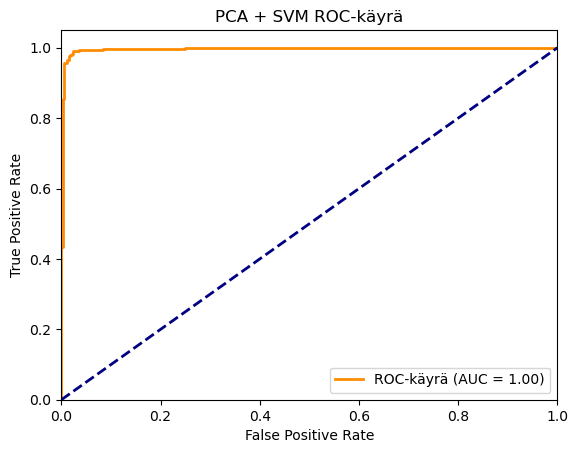

In [11]:
# TODO: Malli 6: PCA yhdistettynä johonkin luokittelumalliin
from sklearn import datasets
from sklearn.decomposition import PCA
# tässä on ilmeisesti aika nolla hyöty käyttää pca sillä meillä oli alunperinkin valittu vain 2 tärkeintä komponenttia?
# siispä kokeillaan vetää aijemmat määrittelyt rajusti nollille jotta saadaan testailtua menetelmää
cr = cm = None
df = None
X_train = X_test = y_train = y_test = []

df = pd.read_csv("voice.csv")
df['label'] = df['label'].map({'male': 0, 'female': 1})

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mms = MinMaxScaler().fit(X_train)

X_train = pd.DataFrame(mms.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(mms.transform(X_test), columns=X.columns)

# 14 pienin jolla saa parhaan tulosken
pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm = LinearSVC()
svm.fit(X_train_pca, y_train)


y_pred = svm.predict(X_test_pca)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(pca.explained_variance_ratio_)

print(cr)
print(cm)

y_score = svm.decision_function(X_test_pca)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Piirretään ROC-käyrä
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-käyrä (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('PCA + SVM ROC-käyrä')
plt.legend(loc="lower right")
plt.show()

## Tehtävä 6.4
### Tulosten analysointi ja käsittely (4 p)

* Verrataan eri menetelmistä saatuja tuloksia toisiinsa.
* Pyri myös hakemaan keskeiset piirteet, jotka positiivisesti vaikuttavat saatuihin tuloksiin. 
   * Piirrä jokin soveltuva kuvio kahden tärkeimmän selittävän muuttujan avulla.
* Piirrä myös ROC - käyrät eri menetelmiä käytettäessä ja vertaa, miten eri koneoppimismenetelmissä etenee..
* Sanallinen pohdinta: Miten kehittäisit tai parantaisit mallien saamia oppimistuloksia? Pohdi, mitkä mallit voisit toimia vielä paremmin kuin tehtävissä annetut luokittelumallit?

#### Vastaus: Tulosten tulkinta

* TODO: MENETELMIEN VERTAILUA VOI TEHDÄ SANALLISESTI SAATUJEN TULOSTEN JA KUVIEN AVULLA.
* TODO: TULOSTEN SANALLISTA TULKINTAA VASTATEN KYSYMYKSIIN, JOITA TEHTÄVÄSSÄ ESITETTY
* TODO: MUUTAKIN SAA TÄHÄN KOMMENTOIDA TEHTÄVÄÄN LIITTYEN.

Kaikilla malleilla oli hyvää suoriutumista.

Pohdin ensin lyhyesti malleja yksitellen pienillä vertauksilla:

#### Decision tree

Malli suoriutui hyvin 0.96 tarkkuudella. Dataluokat olivat suht hyvin tasapainossa ja luokkakohtaista heittelyä 
ennustustuksessa ei pahemmin ollut. ROC käyrässä oli aika paljon diagonaalisesti (ei portaissa) kulkevaa viivaa, joka kai tarkoitti että jotkin luokittelut tehtiin "satunnaisesti".

#### kNN

kNN suoritui myös hyvin 0.97 tarkkuudella. Tämä on loogista sillä uskoisin että kun arvot sijoitetaan ja käsitelläään niin miesten ja naisten arvot painottuvat omiin ryhmiin, jolloin kNN on vahvoilla. ROC käyrä myös vahvistaa ajatusta mallin toimivuudesta.

#### SVM
 
SVM on vahva, niinkuin kaikki muutkin. Tässä kohta tuntuu että on vaikea löytää tai selittää mallien eroja, sillä kaikki suoriutuvat vahvasti. Tämä voisi myös viitata siihen, että datamme on oivallista koneoppimismalleille. Tässä on samaa ajatusta kuin knn kanssa, eli data on mukavasti jakautunutta kahden ennustettavan luokan välillä jolloin tukivektorit jakavat datan mukavasti. Keskeltä meni parit ennusteet väärin, mutta tämä on ollut tähän mennessä paras.

#### Bayes

Ja sama laulu jatkuu. Tässä voisi kompata kahta ylempää ja lainata itseäni tehtävä kolmosesta:

* Datan ominaisuudet ovat enimmäkseen keskittyneet keskiarvon ympärille (normaalijakauma)

Kun gnb toimi näin vahvasti ja tiedän (myös opettajan palautteesta), että gnb suorittaa vahvati normaalijakautuvalla datalla, on loogista miksi kNN ja SVM suoriutuivat myös hyvin.

#### RF Classifier

Kuten uskalsi olettaa, tämä suoriutui paremmin kuin päätöspuu. Tämä tekee usean päätöspuun, jolloin päätöspuun heikkoudet eivät ole aivan niin näkyviä. Voisi kuvitella että tämä vähentää ainakin ylisovittamisen riskiä, joka mainittiin päätöspuun heikkoutena oppimateriaalissa.

#### Molemmat PCA 

SVM voitti kNN marginaalisesti PCA hyödyntäen. Molemmissa sai parhaan tuloksen suht korkealla ominaisuuksien määrällä. Molemmissa tapauksissa PCA on selittänyty suurimman osan datan muuttelusta ensimmäisellä komponentilla.
Molemmilla malleilla toki ennustus taas todella vahvaa. 

SVM virheiden jakauma oli tasapainoisempi kuin kNN, joka on taas loogista kun miettii mallien toimintaa. kNN on enemmän hankaluuksia ennustaa datapisteitä jotka ovat lähellä datan keskipistettä, sillä naapureitten etäisyydet alkavat olemaan samoja molempiin suuntiin.

### Yhteenvetoa

Uskon että "ominaisuuksein ominaisuus" joka vaikutti positiivisesti monen mallin toimintaan oli datan keskittynyt jakauma keskiarvon ympärille. Kaikilla malleilla oli samantyyppisiä ja todella hyviä tuloksia, joten analyysiointi tuntuu vähän haastavalle.

Tehtävää tehdessä kyllä huomasi että tehtävän painopiste on tässä analysoinnissa, sillä moni malli sopi viime tehtävistä helposti tähän itse koodiosuutteen. Vähän jopa pelottaa että on tehnyt jonkin kriittisen virheen mitä ei nyt huomaa, tehtävästä on kuitenkin venynyt aika pitkä ja tuntuu että jotain kuitenkin unohtuu.

Alla on scatter plottia johon on sijoitettu datapisteet IQR ja meanfunia käyttäen. Siniset ovat miehiä ja punaiset
naisia. Tämä kuvaaja auttaa jo paljon selittämään joitain piirteitä malleissamme tai ainakin niihen virheitä.

kNN ei voisi ikinä saada kaikki oikein, sillä luokkia on selvästi toisen luokan "ryppäissä". SVM soveltuu tähän silämällä hyvin, mutta myös sen virheet ovat toki nähtävissä poikkeavien arvojen kanssa. 

Miten näitä voisi parantaa? Ainakin jotain parametreja voisi lisäillä tai säätää malleille, ja luulisin että jokunen rivi voitasiin vielä saada oikealle luokalle.

Tämä kuitenkin riittää tältä erää ja kurssi alkaa olla paketissa. Tykkäsin kurssista paljon, seuraavaksi jatkuukin syväoppiminen joka varmasti antaa taas uudet haasteet. Kiitos!

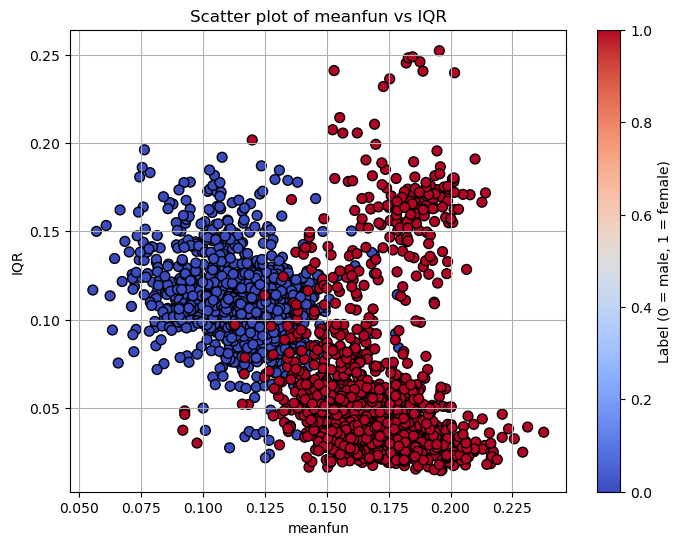

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('voice.csv')
df['label'] = df['label'].map({'male': 0, 'female': 1})

X = df.drop('label', axis=1)
y = df['label']

plt.figure(figsize=(8, 6))
plt.scatter(X['meanfun'], X['IQR'], c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.title('Scatter plot of meanfun vs IQR')
plt.xlabel('meanfun')
plt.ylabel('IQR')
plt.colorbar(label='Label (0 = male, 1 = female)')
plt.grid(True)
plt.show()